In [1]:
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

<ipython-input-2-70f8a5c39d7a>:5: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 300)


In [3]:
pca = PCA()
pca.fit(X)

print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.57532172  0.81792721] 
2nd component: [-0.81792721 -0.57532172]


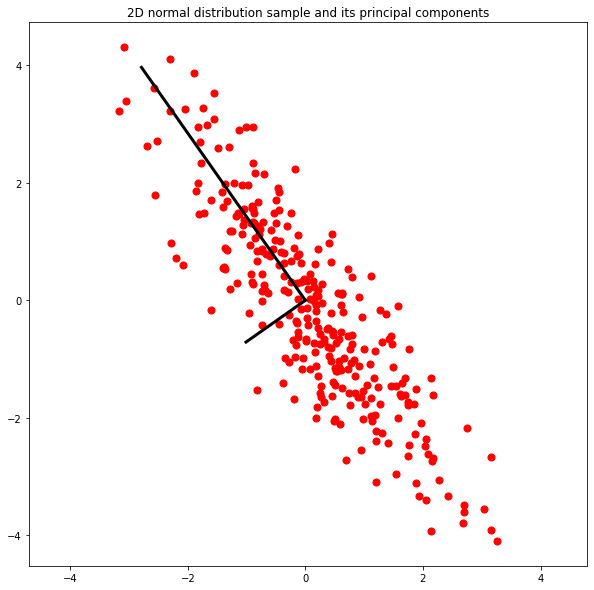

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

In [36]:
U, S, VT = np.linalg.svd(X)
print(np.round(U, 4))
print(np.round(S, 4))
print(np.round(VT, 4))

[[-1.004e-01 -2.260e-02 -1.184e-01 ... -1.250e-02  2.180e-02  4.740e-02]
 [-5.580e-02 -1.297e-01  2.290e-02 ... -2.690e-02  1.990e-02  2.550e-02]
 [-1.063e-01  5.730e-02  9.865e-01 ... -8.000e-04  2.000e-03  4.700e-03]
 ...
 [-2.000e-02 -2.190e-02 -7.000e-04 ...  9.992e-01  7.000e-04  1.100e-03]
 [ 2.680e-02  1.240e-02  1.900e-03 ...  7.000e-04  9.992e-01 -1.300e-03]
 [ 5.290e-02  1.010e-02  4.500e-03 ...  1.100e-03 -1.400e-03  9.974e-01]]
[34.5404  8.771 ]
[[ 0.5749 -0.8182]
 [-0.8182 -0.5749]]


In [10]:
D = S*S
D / D.sum()

array([0.93942382, 0.06057618])

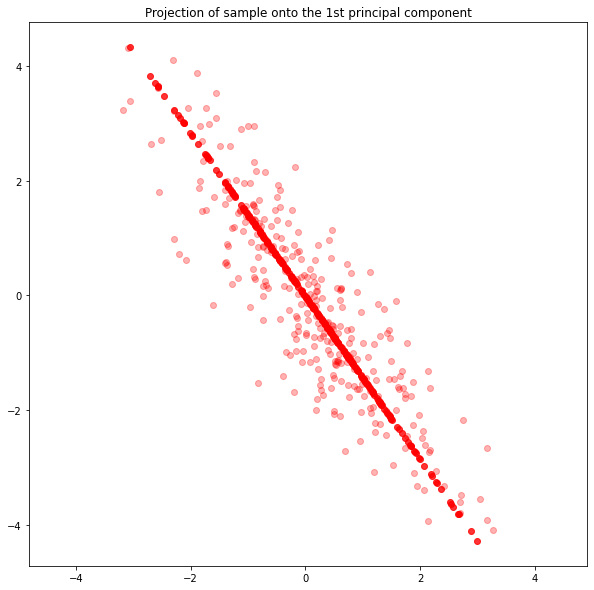

In [11]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

In [62]:
pca.singular_values_, pca.components_

(array([34.41759066]), array([[-0.57532172,  0.81792721]]))

In [16]:
X_reduced.shape, X_new.shape

((300, 1), (300, 2))

In [17]:
X_reduced[:5]

array([[ 3.63595139],
       [ 2.09302149],
       [ 3.83879886],
       [ 2.03562091],
       [-0.03470459]])

In [58]:
X_new[:5]

array([[-2.00522385,  2.82945268],
       [-1.11754277,  1.56744833],
       [-2.12192641,  2.99536714],
       [-1.08451898,  1.52049883],
       [ 0.10658425, -0.17287674]])

### Get the same values from SVD

In [45]:
S_0 = U[:,0] * S[0]

In [46]:
S_0[:5]

array([-3.46804583, -1.92563629, -3.67050452, -1.86756077,  0.20260484])

In [49]:
S_0.reshape(-1,1).shape

(300, 1)

In [53]:
VT[0,:].reshape(1,-1).shape

(1, 2)

In [55]:
A_0 = S_0.reshape(-1,1) @ VT[0,:].reshape(1,-1)

In [56]:
A_0.shape

(300, 2)

In [59]:
A_0[:5]

array([[-1.99366844,  2.83771528],
       [-1.10698661,  1.57564456],
       [-2.11005546,  3.00337634],
       [-1.07360086,  1.52812449],
       [ 0.11647103, -0.16578063]])

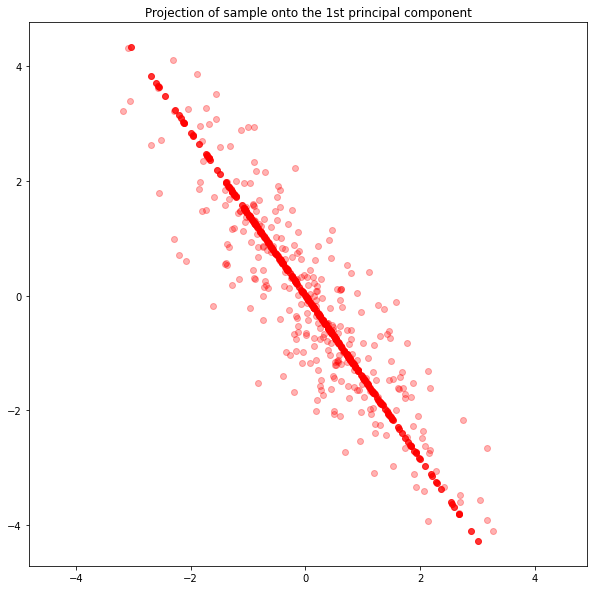

In [61]:
plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(A_0[:, 0], A_0[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

## Digits

Projecting 64-dimensional data to 2D


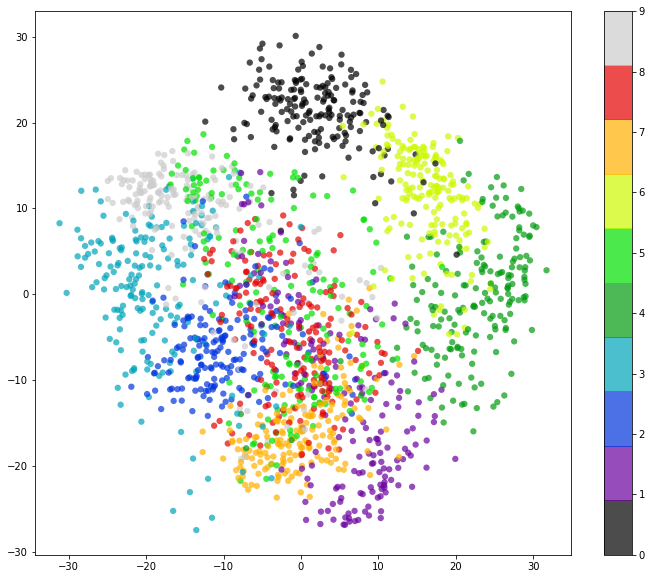

In [63]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

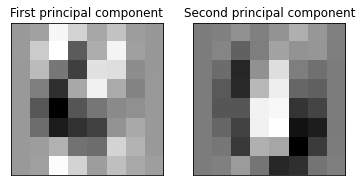

In [71]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0] #* 2
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

In [69]:
pca.components_[0] #* 2 

array([-1.53175243e-17, -1.73094631e-02, -2.23428822e-01, -1.35913305e-01,
       -3.30323013e-02, -9.66340733e-02, -8.32943909e-03,  2.26899950e-03,
       -3.20516468e-04, -1.19308898e-01, -2.44451677e-01,  1.48512735e-01,
       -4.67319468e-02, -2.17740743e-01, -1.48136817e-02,  4.47779393e-03,
       -4.94136747e-05, -7.95419347e-02,  8.33951421e-02,  2.15915343e-01,
       -1.72126801e-01, -1.63712097e-01,  2.86444408e-02,  4.23251748e-03,
        9.85488375e-05,  6.42319162e-02,  2.54093325e-01, -3.56770978e-02,
       -2.09462565e-01, -4.31311294e-02,  5.13118694e-02,  2.13422720e-04,
       -0.00000000e+00,  1.59950888e-01,  3.68690783e-01,  1.64406819e-01,
        8.52007899e-02,  3.72982924e-02,  2.15866992e-02, -0.00000000e+00,
        1.28865599e-03,  1.06945293e-01,  3.03067460e-01,  2.47813047e-01,
        2.09637308e-01,  1.22325220e-02, -3.69458498e-02,  1.61485046e-03,
        6.93023631e-04, -8.35143935e-03, -5.58598909e-02,  9.30534223e-02,
        1.07387727e-01, -

In [72]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

### Сколько компонентов стоить взять?
Традиционное соглашение: столько чтобы ими описывалось 90% дисперсии? наших данных

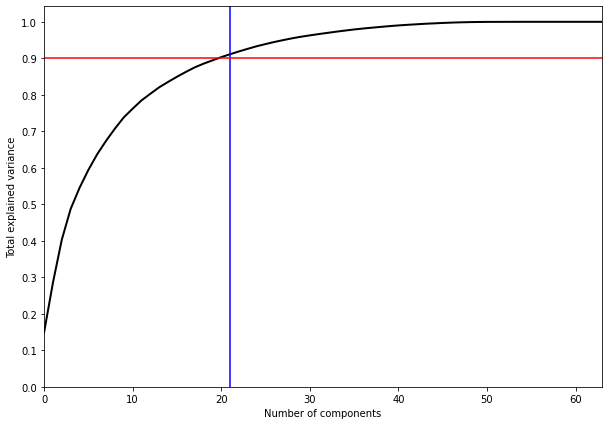

In [74]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [77]:
np.round(pca.explained_variance_ratio_,4)

array([1.489e-01, 1.362e-01, 1.179e-01, 8.410e-02, 5.780e-02, 4.920e-02,
       4.320e-02, 3.660e-02, 3.350e-02, 3.080e-02, 2.370e-02, 2.270e-02,
       1.820e-02, 1.770e-02, 1.470e-02, 1.410e-02, 1.320e-02, 1.250e-02,
       1.020e-02, 9.100e-03, 8.900e-03, 8.000e-03, 7.700e-03, 7.200e-03,
       7.000e-03, 6.000e-03, 5.800e-03, 5.200e-03, 4.900e-03, 4.300e-03,
       3.700e-03, 3.500e-03, 3.400e-03, 3.300e-03, 3.100e-03, 2.900e-03,
       2.600e-03, 2.300e-03, 2.200e-03, 2.100e-03, 1.900e-03, 1.600e-03,
       1.500e-03, 1.400e-03, 1.200e-03, 1.100e-03, 1.000e-03, 8.000e-04,
       6.000e-04, 4.000e-04, 2.000e-04, 1.000e-04, 1.000e-04, 1.000e-04,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])